In [1]:
import numpy as np

In [35]:
def computeVectorLength(v):
    return np.linalg.norm(v)
def computeDotProduct(v, u):
    return v.dot(u)
def matrix_multi_vector(matrix, vector):
    return matrix * vector
def matrix_multi_matrix(matrix, maxtrix2):
    return matrix * maxtrix2
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)
def compute_eigenvalues_eigenvectors(matrix):
    return np.linalg.eig(matrix)
def compute_cosine(v1, v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [5]:
vector = np.array([-2, 4, 9, 21])
result = computeVectorLength([vector])
print(round(result,2))

23.28


In [6]:
v1 = np.array([0, 1,-1, 2])
v2 = np.array([2, 5, 1, 0])
result = computeDotProduct(v1, v2)
print(round(result,2))

4


In [10]:
v1 = np.array([[1, 2],
              [3, 4]])

result = v1.dot(np.array([1,2]))
print(result)

[ 5 11]


In [11]:
v1 = np.array([[-1, 2],
              [3, -4]])

result = v1@(np.array([1,2]))
print(result)

[ 3 -5]


In [40]:
np.linalg.eig(np.array([[4,1],[2,3]]))

EigResult(eigenvalues=array([5., 2.]), eigenvectors=array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))

In [20]:
m = np.array([[-1, 1, 1], [0,-4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(m.dot(v))

[3 1]


In [24]:
m = np.array([[0, 1, 2], [2,-3, 1]])
v = np.array([[1,-3],[6, 1], [0,-1]])
print(m.dot(v))

[[  6  -1]
 [-16 -10]]


In [26]:
m = np.eye(3)
print(m)
v = np.array([[1, 1, 1],[2, 2, 2], [3, 3, 3]])
print(m@v)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [27]:
m = np.eye(2).reshape((-1,4))[0]
print(m)
v = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
print(m@v)

[1. 0. 0. 1.]
[5. 5. 5. 5.]


In [31]:
m = np.array([[1, 2], [3, 4]])
m = np.reshape(m, (-1,4), "F")[0]
print(m)
v = np.array([[1, 1, 1, 1],[2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
print(m@v)

[1 3 2 4]
[29 29 29 29]


In [32]:
m1 = np.array([[-2, 6], [8,-4]])
np.linalg.inv(m1)

array([[0.1 , 0.15],
       [0.2 , 0.05]])

In [33]:
np.linalg.eig(np.array([[0.9, 0.2], [0.1, 0.8]]))

EigResult(eigenvalues=array([1. , 0.7]), eigenvectors=array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]]))

In [36]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print(round(result, 3))

0.577


In [49]:
import cv2
import matplotlib.pyplot as plt

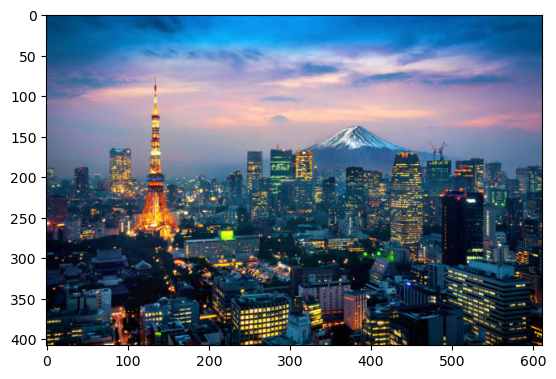

In [50]:
IMAGE_SIZE = (678, 381)

bg1 = cv2.imread("./Image data/GreenBackground.png",1)
bg2 = cv2.imread("./Image data/NewBackground.jpg",1)
img = cv2.imread("./Image data/Object.png",1)

plt.imshow(bg2[:,:,::-1])

In [52]:
bg1 = cv2.resize(bg1, IMAGE_SIZE)
bg2 = cv2.resize(bg2, IMAGE_SIZE)
img = cv2.resize(img, IMAGE_SIZE)

print(bg1.shape, bg2.shape, img.shape)

(381, 678, 3) (381, 678, 3) (381, 678, 3)


In [95]:
def computeDifference(bg_img, input_img):
    difference_three_channels = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channels, axis=2) / 3.0 - 10
    difference_single_channel = difference_single_channel.astype(np.uint8)

    return difference_single_channel


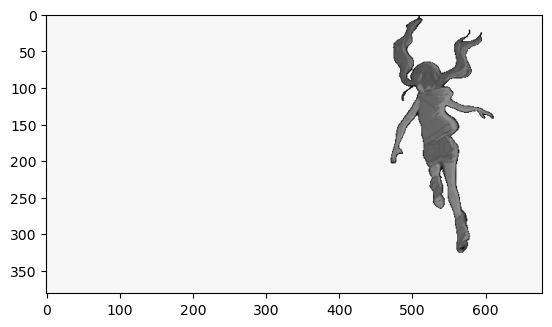

In [96]:
difference_single_channel = computeDifference(bg1, img)
plt.imshow(difference_single_channel, cmap='gray')

In [92]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    difference_binary = np.stack((difference_binary,)*3, axis=-1)
    return difference_binary

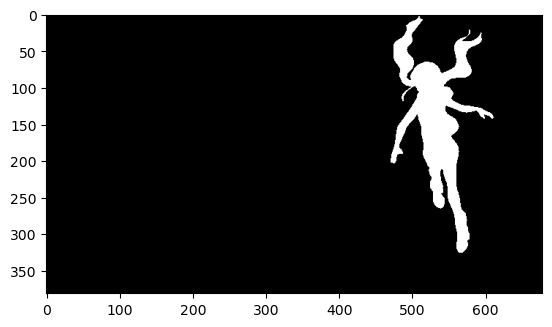

In [93]:
difference_binary = computeBinaryMask(difference_single_channel)
plt.imshow(difference_binary)

In [90]:
def replaceBackGround(bg1, bg2, img):
    difference_single_channel = computeDifference(bg1, img)
    binary_mask = computeBinaryMask(difference_single_channel)

    output = np.where(binary_mask==255, img, bg2)
    return output

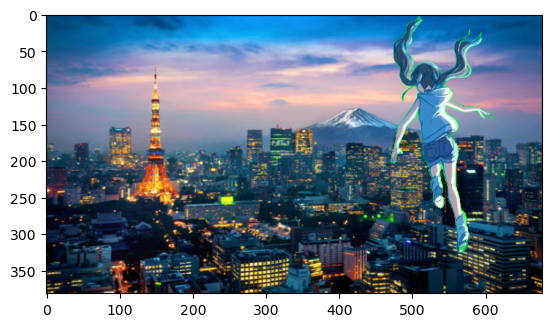

In [94]:
output = replaceBackGround(bg1, bg2, img)

plt.imshow(output[:,:,::-1])